# PIP install necessary packages 

In [1]:
!pip install --upgrade gitpython --user
!pip install --upgrade mpld3 --user

Requirement already up-to-date: gitpython in /home/oreilly/.local/lib/python3.4/site-packages
Requirement already up-to-date: gitdb>=0.6.4 in /home/oreilly/.local/lib/python3.4/site-packages (from gitpython)
Requirement already up-to-date: smmap>=0.8.5 in /home/oreilly/.local/lib/python3.4/site-packages (from gitdb>=0.6.4->gitpython)
You are using pip version 8.0.2, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already up-to-date: mpld3 in /home/oreilly/.local/lib/python3.4/site-packages
You are using pip version 8.0.2, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


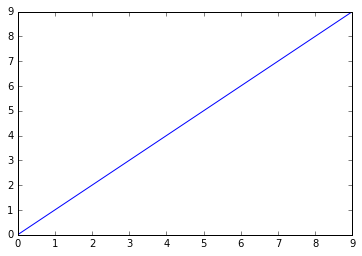

In [2]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt

plt.plot(range(10), range(10))


# GIT clone the corpus

In [3]:
from git import Repo
import os

git_url = "https://github.com/christian-oreilly/corpus-thalamus.git"
repo_dir = os.path.join(os.getcwd(), "neurocuratorDB")
if not os.path.isdir(repo_dir):
    Repo.clone_from(git_url, repo_dir)
else:
    Repo(repo_dir).remotes.origin.pull()

# Querying the corpus

In [4]:
# General imports
import sys, os
import matplotlib.pylab as plt
import seaborn as sns
import quantities as pq
import numpy as np

# Imports from NeuroCurator code base
from neurocurator.annotationSearch import ParameterSearch, ConditionAtom

# Searching for annotations
searcher = ParameterSearch(repo_dir)
searcher.setSearchConditions(ConditionAtom("Parameter name", "conductance_ion_curr_max"))
searcher.expandRequiredTags = True
searcher.onlyCentralTendancy = True
resultDF = searcher.search()

# Checking which conductances have been specified as "specific conductances"
# (i.e., conductance densities) and normalizing the units.
isSpecific = []
allConductances = []
for v, u in zip(resultDF["Values"], resultDF["Unit"]):
    try:
        allConductances.append(float(pq.Quantity(v, u).rescale('S/cm**2')))
        isSpecific.append(True)
    except:
        isSpecific.append(False)

resultDF = resultDF[isSpecific]
resultDF["Values"] = np.log10(allConductances)

Incompatibility between in NIFMOL:nifext_8054:Sodium transient fast current. Correcting to BBP_nlx_0003:Sodium transient fast current
Incompatibility between in NIFCELL:sao1813327414:Thalamic reticular nucleus cell. Correcting to NIFCELL:nifext_45:Thalamic reticular nucleus cell
Incompatibility between in NIFMOL:nifext_8054:Potassium delayed rectifier. Correcting to BBP_nlx_0006:Potassium delayed rectifier
Incompatibility between in NIFCELL:sao1813327414:Thalamic reticular nucleus cell. Correcting to NIFCELL:nifext_45:Thalamic reticular nucleus cell
Incompatibility between in NIFMOL:nifext_8054:Sodium transient fast current. Correcting to BBP_nlx_0003:Sodium transient fast current
Incompatibility between in NIFCELL:sao1813327414:Thalamic reticular nucleus cell. Correcting to NIFCELL:nifext_45:Thalamic reticular nucleus cell
Incompatibility between in NIFMOL:nifext_8054:Potassium delayed rectifier. Correcting to BBP_nlx_0006:Potassium delayed rectifier
Incompatibility between in NIFCELL

KeyError: 'NIFMOL:nifext_6'

# Plotting the result of our query

In [12]:
%matplotlib inline

# Plotting a violin plot for annotated values for specific conductances
# of the various kind of ionic currents 
g = sns.violinplot(y="Transmembrane ionic current", x="Values", data=resultDF, bw=0.25)
g = sns.swarmplot( y="Transmembrane ionic current", x="Values", data=resultDF)
g.set_ylabel("")
g.set_xlabel("Specific conductance ($S/cm^2$)")
g.set_xticklabels([('%.0e' % 10**nb) for nb in g.get_xticks()]) 
plt.plot()
plt.savefig('example_currents.png', bbox_inches='tight', transparent=True, dpi=200)

NameError: name 'resultDF' is not defined

# Printing the JSON representation of a specific annotation of the plot

In [ ]:
import json
record = resultDF[resultDF["Transmembrane ionic current"] == "Fast voltage-gated potassium (Kf) current"]
print(json.dumps(record["obj_annotation"].values[0].toJSON(), 
                 sort_keys=True, indent=4, separators=(',', ': ')))

# Showing the annotated text in its context